# **TIMISE toolbox example usage for multiple methods**


This example downloads some toy data part of MitoEM validation set and evaluate them using the toolbox. The difference between these notebook and the one called "TIMISE_one_method_evaluation_example.ipynb" is that here multiple methods are evaluated at once. This allows to plot each method error in just one plot to compare them easily. This workflow was the one used ot evaluation MitoEM challenge submission. 

Take a look to 1) "TIMISE_example_files" folder (when downloading it in step 2) to see how different methods predictions and ground truth are place and 2) the paths used when calling evaluate() function.  

## **1. Download data and prepare enviroment**
---



First we need to download the code.

In [ ]:
import os
%cd '/content/'
if not os.path.exists('/content/TIMISE'):
    !git clone https://github.com/danifranco/TIMISE.git

/content
Cloning into 'TIMISE'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 272 (delta 143), reused 199 (delta 72), pack-reused 0
Receiving objects: 100% (272/272), 12.17 MiB | 19.84 MiB/s, done.
Resolving deltas: 100% (143/143), done.


Install the dependencies

In [ ]:
!pip install -r '/content/TIMISE/examples/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 15.9 MB/s 
     |████████████████████████████████| 9.0 MB 85.2 MB/s 
     |████████████████████████████████| 357 kB 64.4 MB/s 
     |████████████████████████████████| 427 kB 71.6 MB/s 
     |████████████████████████████████| 193 kB 77.0 MB/s 
     |████████████████████████████████| 96 kB 3.7 MB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
     |████████████████████████████████| 224 kB 85.9 MB/s 
     |████████████████████████████████| 908 kB 56.5 MB/s 
     |████████████████████████████████| 2.1 MB 51.6 MB/s 
     |████████████████████████████████| 2.7 MB 56.0 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 4.1 MB 50.8 MB/s 
     |████████████████████████████████| 168 kB 90.9 MB/s 
     |████████████████████████████████| 1.8 MB 67.3 MB/s 
     |███████████████████████████████

## **2. Download example data**
---

In [ ]:
example_files="TIMISE_example_files.zip"
if not os.path.exists(example_files):
    %cd '/content'
    !gdown --id 1FvOGkhAUJOxa-8HcClK0ygDWD1-nrS5Y
    !unzip '/content/'{example_files}
    print("Example data downloaded")


/content
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FvOGkhAUJOxa-8HcClK0ygDWD1-nrS5Y
To: /content/TIMISE_example_files.zip
100% 1.14M/1.14M [00:00<00:00, 97.4MB/s]
Archive:  /content/TIMISE_example_files.zip
   creating: TIMISE_example_files/
   creating: TIMISE_example_files/GT/
  inflating: TIMISE_example_files/GT/gt.h5  
   creating: TIMISE_example_files/methodA/
  inflating: TIMISE_example_files/methodA/methodA.h5  
   creating: TIMISE_example_files/methodB/
  inflating: TIMISE_example_files/methodB/methodB.h5  
Example data downloaded


Inspect the toy data:

/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


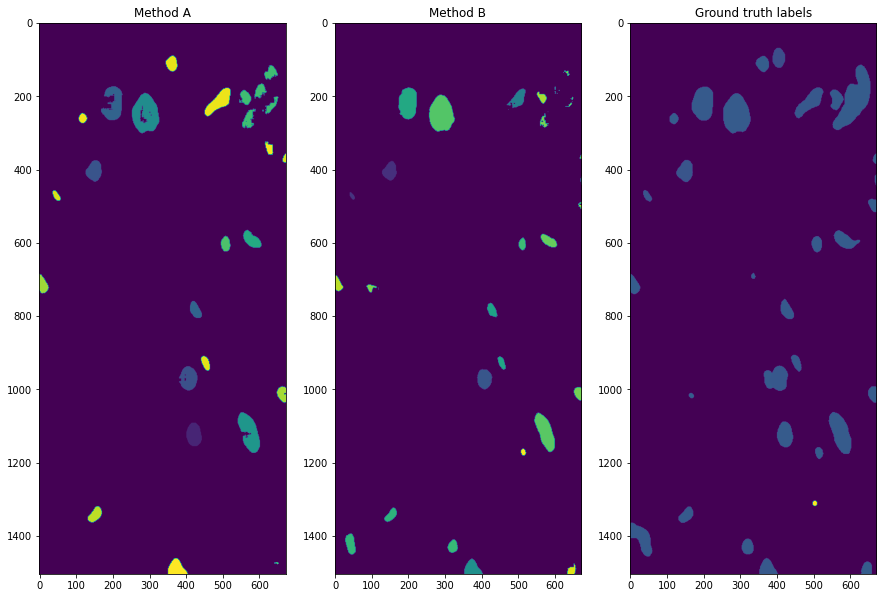

In [ ]:
import os
import sys
import h5py
import numpy as np
from skimage.io import imread

# Show a few examples to heck that they have been stored correctly 
%matplotlib inline
from numpy.random import randint, seed
from matplotlib import pyplot as plt

def load_img(path):
    h5f = h5py.File(path, 'r')
    k = list(h5f.keys())
    return np.array(h5f[k[0]])

toy_sample = load_img("/content/TIMISE_example_files/methodA/methodA.h5") 
toy_sample2 = load_img("/content/TIMISE_example_files/methodB/methodB.h5") 
toy_mask = load_img("/content/TIMISE_example_files/GT/gt.h5") 

# Select random slice
slice = randint(0, toy_sample.shape[0], 1)

plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)    
plt.title("Method A")
plt.imshow(toy_sample[slice].squeeze())
plt.subplot(1, 3, 2)    
plt.title("Method B")
plt.imshow(toy_sample2[slice.squeeze()])
plt.subplot(1, 3, 3)    
plt.title("Ground truth labels")
plt.imshow(toy_mask[slice].squeeze())
plt.show()

## **2. Running TIMISE**


In [ ]:
%cd /content/TIMISE
from timise import TIMISE

# Create three instance categories, small/medium/large, based on the cable length property. 
# The thresholds used to create those categories are 500 and 1000, which means:
#   - instances with cable length < 500 will be labelled as 'small'
#   - instances with 500 <= cable length < 1000 will be labelled as 'medium'
#   - instances with 1000 < cable length will be labelled as 'large' 
timise = TIMISE(split_categories=['small', 'medium', 'large'], split_property='cable_length', split_ths=[500, 1000]);

/content/TIMISE


In [ ]:
timise.evaluate("/content/TIMISE_example_files", "/content/TIMISE_example_files/GT", "/content/out_dir")

*** Preliminary checks . . . 
Found 2 predictions: ['/content/TIMISE_example_files/methodA', '/content/TIMISE_example_files/methodB']
*** [DONE] Preliminary checks . . .
Calculating GT statistics . . .
Reading file /content/TIMISE_example_files/GT/gt.h5 . . .
Calculating volumes . . .
Skeletonizing . . .


Skeletonizing Labels:  96%|█████████▋| 105/109 [00:02<00:00, 51.37it/s]


Calculating cable length . . .
Adding categories information . . .
Creating grouping aux file for mAP calculation . . .
*** Evaluating . . .
Processing folder /content/TIMISE_example_files/methodA
Calculating predictions statistics . . .
Reading file /content/TIMISE_example_files/methodA/methodA.h5 . . .
Calculating volumes . . .
Skeletonizing . . .


Skeletonizing Labels: 100%|██████████| 218/218 [00:04<00:00, 49.25it/s]


Calculating cable length . . .
Adding categories information . . .
Calculating associations . . .
Associations between images /content/TIMISE_example_files/methodA/methodA.h5 and /content/TIMISE_example_files/GT/gt.h5
Image loading . . .
Calculation of matching between instances . . .
Calculating rest of missing instances not present in associations . . .
Total gt labels: 104 (processed 104)
Creating grouping aux file for mAP calculation . . .
Run mAP code . . .
	1. Load data
		 Assign prediction score
	2. Compute IoU
	 compute bounding boxes
		 chunk 0
		 chunk 1
		 chunk 2
		 chunk 3
		 chunk 4
	 compute iou matching


218it [00:00, 490.65it/s]


	-RUNTIME:	5.876 [sec]

start evaluation
Accumulating evaluation results...
DONE (t=0.01s).
Parsing /content/out_dir/methodA/map_match_p.txt file to build a dataframe . . .
Dataframe stored in /content/out_dir/methodA/map.csv . . .
Calculating matching metrics . . .
Using matching previously calculated with mAP . . .
Processing folder /content/TIMISE_example_files/methodB
Calculating predictions statistics . . .
Reading file /content/TIMISE_example_files/methodB/methodB.h5 . . .
Calculating volumes . . .
Skeletonizing . . .


Skeletonizing Labels:  94%|█████████▎| 146/156 [00:00<00:00, 152.38it/s]


Calculating cable length . . .
Adding categories information . . .
Calculating associations . . .
Associations between images /content/TIMISE_example_files/methodB/methodB.h5 and /content/TIMISE_example_files/GT/gt.h5
Image loading . . .
Calculation of matching between instances . . .
Calculating rest of missing instances not present in associations . . .
Total gt labels: 104 (processed 104)
Creating grouping aux file for mAP calculation . . .
Run mAP code . . .
	1. Load data
		 Assign prediction score
	2. Compute IoU
	 compute bounding boxes
		 chunk 0
		 chunk 1
		 chunk 2
		 chunk 3
		 chunk 4
	 compute iou matching


156it [00:00, 407.02it/s]


	-RUNTIME:	5.704 [sec]

start evaluation
Accumulating evaluation results...
DONE (t=0.01s).
Parsing /content/out_dir/methodB/map_match_p.txt file to build a dataframe . . .
Dataframe stored in /content/out_dir/methodB/map.csv . . .
Calculating matching metrics . . .
Using matching previously calculated with mAP . . .
*** [DONE] Evaluating . . .


We can print a summary of the metrics:

In [ ]:
timise.summary()

Stats in /content/out_dir/methodA

              Average Precision (AP)              
+---------------+----------+----------+----------+
| IoU=0.50:0.95 | IoU=0.50 | IoU=0.75 | IoU=0.90 |
+---------------+----------+----------+----------+
|     0.095     |   0.22   |  0.085   |  0.003   |
+---------------+----------+----------+----------+

                                                Associations                                               
+----------+-------+------------+---------+-------------------+--------------------+--------------+-------+
| category |       | one-to-one | missing | over-segmentation | under-segmentation | many-to-many | Total |
+----------+-------+------------+---------+-------------------+--------------------+--------------+-------+
|  small   | Count |     18     |    12   |         19        |         1          |      0       |   50  |
|          |   %   |    36.0    |   24.0  |        38.0       |        2.0         |     0.0      |       |
|  medium 

We can also plot the errors for each category by simply calling plot() function:

In [ ]:
timise.plot(order=["methodA", "methodB"], plot_shape=[800,500])

You can also create a script to visualize all the instances of the prediction or just the ones that match a given category. For instance:

In [ ]:
# Create methodB visualization script for large instances
timise.create_neuroglancer_file("methodB", categories=['large'])

# Create GT visualization script for large instances
timise.create_neuroglancer_file("gt", categories=['large'])

Neuroglancer script created in /content/out_dir/neuroglancer_methodB_large.py
Neuroglancer script created in /content/out_dir/neuroglancer_gt_large.py


This will create two different neuroglancer scripts. When you run them (follow the steps described [here](https://github.com/danifranco/TIMISE/tree/main/examples/neuroglancer) to do so) the result should be this:

**Left: GT ; Right: methodB**

# 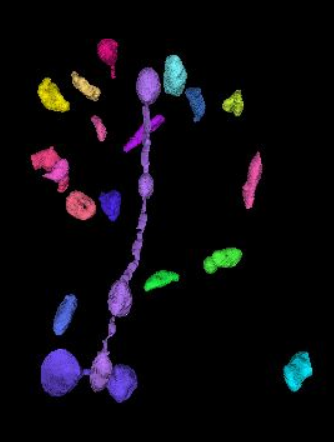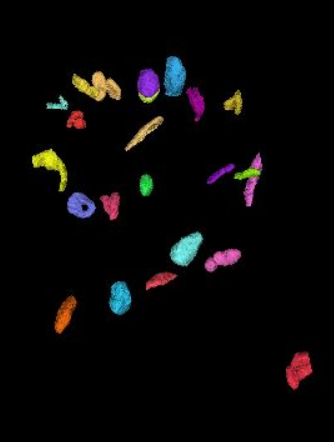